In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

np.random.seed(1)

**Ejercicios de algoritmos de Agrupación..**

* Limpieza e interpretación de los datos.
* Preprocesados y PCA.
* Encontrar número de clústeres óptimo.
* Creación de modelos. unsupervised (k-means y clustering jerárquico).
* Interpretar los resultados.

# Ejercicio 1
Descargue el dataset adjunto, de registros de publicaciones en Facebook sobre Tailandia, y clasifique los diferentes registros utilizando el algoritmo de **K-means**.

##### Importante

Ten en cuenta que previamente necesitarás preparar el dataset.

## Modelo de agrupación (Clustering)

El clustering es el proceso global que implica encontrar grupos de datos similares que existen en su conjunto de datos, lo que puede ser extremadamente valioso si usted está tratando de encontrar su significado subyacente. La agrupación es una forma de algoritmo no supervisado. Esto significa que, a diferencia de la clasificación o la regresión, la agrupación no requiere datos etiquetados reales. Estos algoritmos son capaces de encontrar grupos que no están explícitamente etiquetados e identificar patrones subyacentes que puedan aparecer en el conjunto de datos. Uno de los algoritmos de agrupación más sencillos pero eficaces es el algoritmo **K-means**.

### k-means sin matemáticas

El algoritmo sin matemáticas para la agrupación k-means es bastante sencillo:

1. En primer lugar, elegiremos "k" centroides, donde "k" sería el número esperado de clusters distintos. El valor de k lo elegiremos nosotros y determinará el tipo de clustering que obtengamos.

2. A continuación, colocaremos los "k" centroides en lugares aleatorios entre los datos de entrenamiento existentes.

3. A continuación, se calculará la distancia de cada centroide a todos los puntos de los datos de entrenamiento. En breve entraremos en detalle sobre las funciones de distancia, pero por ahora, vamos a considerarla simplemente como la distancia a la que se encuentran unos puntos de otros.

4. Ahora, todos los puntos de entrenamiento se agruparán con su centroide más cercano.

5. Aislando los puntos de entrenamiento agrupados junto con sus respectivos centroides, calcule el punto de datos medio en el grupo y mueva el centroide anterior a la ubicación media.

6. Este proceso se repetirá hasta la convergencia o hasta que se haya alcanzado el límite máximo de iteración.

La matemática más importante que sustenta este algoritmo es la función de distancia. Una función de distancia es básicamente cualquier fórmula que le permite entender cuantitativamente cuán lejos está un objeto de otro, siendo la más popular la fórmula de distancia euclidiana:

$$
dist\_Euclidean(x,y)=\sum_{i=1}^{n}\sqrt{(x_{i}-y_{i})^2},\qquad x=(x_{1},x_{2},\cdots,x_{n}),\,\,y=(y{1},y_{2},\cdots,y_{n}).
$$

Otra métrica de distancia popular que puede utilizarse para la agrupación es la distancia Manhattan.

$$
dist\_Manhattan(x,y)=\sum_{i=1}^{n}|(x_{i}-y_{i}|,\qquad x=(x_{1},x_{2},\cdots,x_{n}),\,\,y=(y{1},y_{2},\cdots,y_{n}).
$$

# Solución

In [206]:
df=pd.read_csv('Publicacions Facebook Thailandia.csv')
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


Facebook Live Sellers in Thailand" es un conjunto de datos recopilados en UCI Machine Learning Datasets. Los datos contienen 7050 observaciones y doce atributos. Los datos se refieren a la función de venta en directo en la plataforma Facebook. Cada registro contiene información sobre el momento en que se publica la información de la venta en directo en Facebook y las interacciones en los datos. Los mensajes son interacciones habituales en Facebook, como compartir o responder a emociones. 

El prpósito del siguiente ejercicio es crear un modelo de agrupación.

|Variable|Descripción|
|--------|-----------|
|status_id | identificador único de la entrada|
|status_type | tipo de mensaje|
|status_published | fecha y hora de publicación de la entrada|
|num_reactions | número de likes, loves, wows, hahas, sads y angrys|
|num_comments | número de comentarios|
|num_shares | número de comparticiones|
|num_likes | número de me gusta|
|num_loves | número de amores|
|num_wows | número de guau|
|num_hahas | número de jajás|
|num_sads | número de tristes|
|num_angrys | número de enfados|

## 1.1 EDA

1. Verificar si existen valores nulos.

In [5]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

2. Observar los tipos de datos de cada columna.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

3. Vamos a prescindir de las 4 últimas columnas las cuales son nulas. Además, haremos lo mismo con **status_id** pues no aporta nada a nuestro estudio, y lo haremos de la siguiente manera:

In [207]:
df=df.iloc[:,1:12]
df.head()

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [208]:
df = df.drop('status_published', axis=1)
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


4. Mostrar descripción estadística de las variables.

In [153]:
df.describe().round(2)

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.00,7050.00,7050.00,7050.00,7050.00,7050.00,7050.00,7050.00,7050.00
mean,230.12,224.36,40.02,215.04,12.73,1.29,0.70,0.24,0.11
std,462.63,889.64,131.60,449.47,39.97,8.72,3.96,1.60,0.73
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,17.00,0.00,0.00,17.00,0.00,0.00,0.00,0.00,0.00
50%,59.50,4.00,0.00,58.00,0.00,0.00,0.00,0.00,0.00
75%,219.00,23.00,4.00,184.75,3.00,0.00,0.00,0.00,0.00
max,4710.00,20990.00,3424.00,4710.00,657.00,278.00,157.00,51.00,31.00


5. Codificar la variable **status_type** con la método **LabelEncoder()**

In [154]:
df.status_type.unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

Podemos ver que hay 4 categorías de etiquetas en la variable **status_type**. A continuación la transformaremos de la siguiente manera:

In [209]:
label_encoder=LabelEncoder()
df.status_type=label_encoder.fit_transform(df.status_type)
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


6. Escaler variables del DataFrame.

In [191]:
#scaler=MinMaxScaler()
#df[df.columns]=scaler.fit_transform(df)
#df.head()

## 1.2. Aplicar el algoritmo de agrupación **K-Means**.

1. Agrupamos los puntos con **k-means** usando  $k=3$.

In [192]:
n = 3
kmeans = KMeans(n_clusters= n, init='k-means++',random_state= 42)
kmeans.fit(df)

KMeans(n_clusters=3, random_state=42)

2. El resultado son cuatros centroides en torno a los cuales se agrupan los puntos y las etiquetas para cada punto que indican a qué cluster pertenece dicho punto.

In [193]:
centers = kmeans.cluster_centers_
labels = kmeans.labels_

3. Dibujamos ahora los puntos y los centroides, utilizando un color distinto para los puntos de cada cluster.

In [194]:
label = kmeans.fit_predict(df)
df_test = df.copy()
df_test['label'] = label
df_test['label'] = df_test['label'].astype(str)
df_test.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,label
0,3,529,512,262,432,92,3,1,1,0,0
1,1,150,0,0,150,0,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0,0
3,1,111,0,0,111,0,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0,0


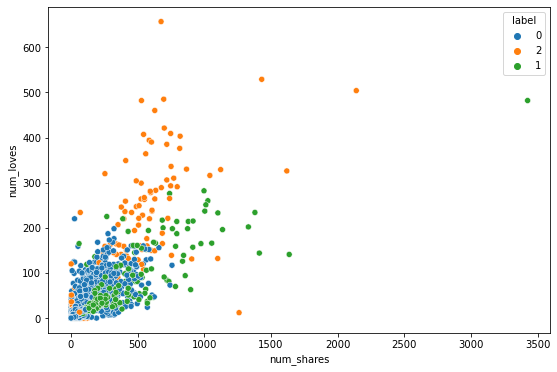

In [195]:
plt.figure(figsize= (9,6))
sns.scatterplot(data = df_test, x='num_shares', y='num_loves', hue = 'label');


## 1.3 Elección del número óptimo de clusters en Kmeans

1. Encontrar el número óptimo de K clusters utilizando la técnica del codo(**elbow**).

In [196]:
K=range(1,14)
distance_values = []
for cluster in K:
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(df)
    distance_values.append(kmeans.inertia_)

df_output = pd.DataFrame({'Cluster':range(1,14), 'distance_values':distance_values})    
df_output

,Cluster,distance_values
0,1,8.645692e+09
1,2,4.986398e+09
2,3,2.735264e+09
3,4,2.002154e+09
4,5,1.469931e+09
5,6,1.186926e+09
6,7,9.234677e+08
7,8,7.499752e+08
8,9,6.214264e+08
9,10,5.232005e+08


2. Visualizar K-means

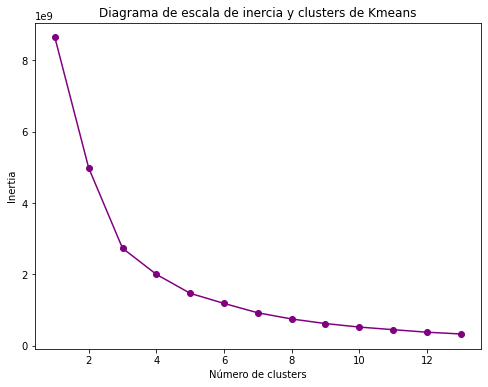

In [197]:
plt.figure(figsize=(8,6))
plt.plot(df_output['Cluster'], df_output['distance_values'], marker='o',color='purple')
plt.title('Diagrama de escala de inercia y clusters de Kmeans')
plt.xlabel('Número de clusters')
plt.ylabel('Inertia')
plt.show()

# Ejercicio 2
Clasifique los diferentes registros utilizando el algoritmo de clustering jerárquico.

## 2.1  Clustering jerárquico

Es importante tener en cuenta que la distancia euclídea es una de las métricas de distancia más populares, no la única. A través de estas métricas de distancia, ampliaremos los cálculos de vecinos comunes introduciendo el concepto de jerarquía. Al utilizar la jerarquía para transmitir la información de agrupación, podemos crear agrupaciones más sólidas que tengan más sentido lógico. Al igual que k-means, la agrupación jerárquica puede ser útil para casos como la segmentación de clientes o la identificación de tipos de productos similares. Sin embargo, hay una pequeña ventaja en poder explicar las cosas de una manera más clara con la agrupación jerárquica.

Este algoritmo tiene el mismo uso que la agrupación K-Means, pero el enfoque es diferente. Comenzamos determinando los dos puntos más cercanos y los agrupamos como uno. A continuación, procedemos a encontrar el siguiente conjunto de dos grupos más cercanos y los agrupamos como uno. Repetimos esta operación hasta obtener el número deseado de grupos.

# Solución

In [172]:
df.columns

Index(['status_type', 'num_reactions', 'num_comments', 'num_shares',
       'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads',
       'num_angrys'],
      dtype='object')

In [210]:
Z=df.iloc[:,1:10]
Y=df.iloc[:,0]
Y

0       3
1       1
2       3
3       1
4       1
       ..
7045    1
7046    1
7047    1
7048    1
7049    1
Name: status_type, Length: 7050, dtype: int64

In [212]:
X=Z
model = AgglomerativeClustering(n_clusters=3)
model.fit(X)
print(model.labels_)
X['predict'] =  model.labels_
print("Accuracy :", metrics.accuracy_score(Y, X.predict))

[2 2 2 ... 2 2 2]
Accuracy : 0.04056737588652482


In [215]:
x, y = df[['num_wows', 'num_sads']], df['status_type']

In [216]:
agglo = AgglomerativeClustering(n_clusters=3)
y_pred = agglo.fit_predict(x)
print("Accuracy :", metrics.accuracy_score(y, y_pred))

Accuracy : 0.6070921985815603


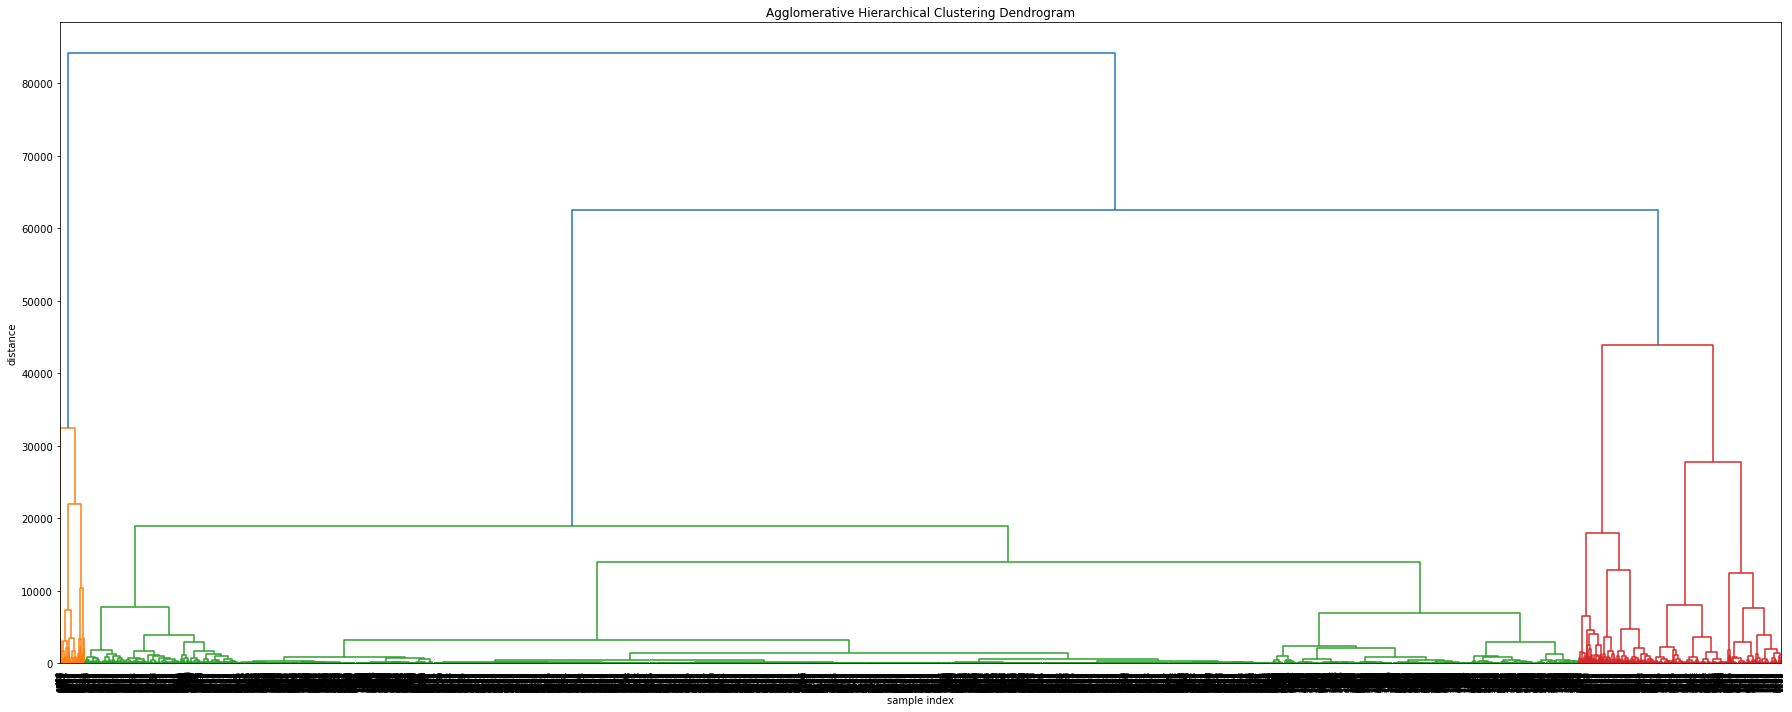

In [66]:
Z = linkage(X, 'ward')
c, coph_dists = cophenet(Z, pdist(df))
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Agglomerative Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z,
           leaf_rotation=90.,  # rotates the x axis labels
           leaf_font_size=8.,  # font size for the x axis labels
          )
plt.tight_layout()
#----output----

In [132]:
model.children_[-5:]

array([[14086, 14088],
       [14070, 14093],
       [14091, 14094],
       [14092, 14096],
       [14095, 14097]])

# Ejercicio 3
Calcule el rendimiento del clustering intermediando un parámetro como puede ser silhouette.

## 3.1 Rendimiento de la agrupación - Puntuación Silhouette

Comprender el rendimiento de los métodos de aprendizaje no supervisado es mucho más difícil que el de los métodos de aprendizaje supervisado, ya que no se dispone de la verdad sobre el terreno. En el caso del aprendizaje supervisado, existen muchas métricas de rendimiento sólidas, de las cuales la más sencilla es la precisión, que consiste en comparar las etiquetas predichas por el modelo con las etiquetas reales y ver cuántas ha acertado el modelo. Desgraciadamente, en el caso de la agrupación, no disponemos de etiquetas en las que basarnos y necesitamos comprender lo "diferentes" que son nuestras agrupaciones. Esto se consigue con la métrica de puntuación de siluetas (Silhouette). También podemos utilizar las puntuaciones de silueta para encontrar el número "K" óptimo de agrupaciones(clusters) para nuestros métodos de aprendizaje no supervisado.

La puntuación del coeficiente de silueta calcula la distancia media entre cada punto y todos los demás puntos de su conglomerado (a), así como la distancia media entre cada punto y todos los demás puntos de su conglomerado más cercano (b). Los relaciona de acuerdo con la siguiente ecuación:

$$
s = \frac{b - a}{ \max(a,b)}.
$$

La métrica de la silueta funciona analizando lo bien que encaja un punto en su conglomerado. La métrica oscila entre -1 y 1. Si la puntuación media de la silueta a lo largo de su agrupación es uno, entonces habrá logrado agrupaciones perfectas y habrá una confusión mínima sobre qué punto pertenece a cada lugar. Sin embargo, esto es muy raro; la puntuación de la silueta debe tratarse como un intento de hacerlo lo mejor posible, ya que acertar es muy poco probable. Si la puntuación de la silueta es positiva, significa que un punto está más cerca del conglomerado asignado que de los conglomerados vecinos. Si la puntuación de la silueta es 0, entonces un punto se encuentra en el límite entre el conglomerado asignado y el siguiente conglomerado más cercano. Si la puntuación de la silueta es negativa, indica que un punto determinado se ha asignado a un conglomerado incorrecto y que, de hecho, es probable que pertenezca a un conglomerado vecino.

# Solución

In [22]:
X=df
score = []
for n_clusters in range(2,10):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    score.append(silhouette_score(X, labels, metric='euclidean'))

In [115]:
np.round(score,4)

array([0.8722, 0.8121, 0.8165, 0.7849, 0.7615, 0.7614, 0.7614, 0.6572])

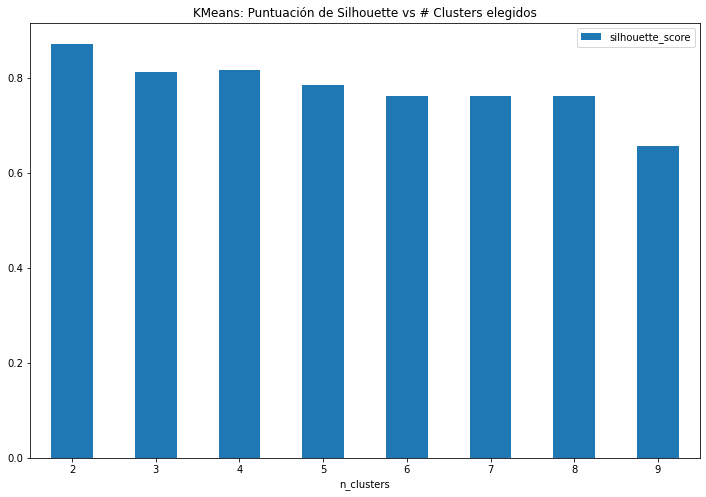

In [131]:
j=[i for i in range(2,10)]
pd.DataFrame({'n_clusters': j,
              'silhouette_score': score
             }).set_index('n_clusters').plot(kind='bar',figsize=(12,8))
plt.title('KMeans: Puntuación de Silhouette vs # Clusters elegidos')
plt.xticks(rotation = 360)
plt.show()


Las puntuaciones resultantes confirman nuestra decisión inicial de que dos es la mejor opción para el número de clusters:

## DBSCAN

In [22]:
epsilon = [1,1.25,1.5,1.75, 2,2.25,2.5,2.75, 3,3.25,3.5,3.75, 4]
min_samples = [10,15,20,25]

In [29]:
sil_avg = []
max_value = [0,0,0,0]
for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(df)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = metrics.silhouette_score(df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 4 
min_sample= 20 
number of clusters= 1 
average silhouette score= 0.2495


El modelo (epsilon = 4 y min_muestra = 20) que tiene  0.2495 de puntuación media máxima de silueta tiene el número óptimo de conglomerados; 1.

In [32]:
db = DBSCAN(eps=4, min_samples=20).fit(df)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(df, labels))

Estimated number of clusters: 1
Estimated number of noise points: 3545
Silhouette Coefficient: 0.250


## plot

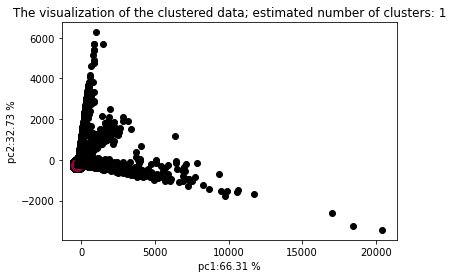

In [33]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = pca_data1[class_member_mask & core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = pca_data1[class_member_mask & ~core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('The visualization of the clustered data; estimated number of clusters: %d' % n_clusters_)
plt.xlabel("pc1:"+"{:.2f}".format(pca.explained_variance_ratio_[0]*100)+" %")
plt.ylabel("pc2:"+"{:.2f}".format(pca.explained_variance_ratio_[1]*100)+" %")
plt.show()

Este método nos permite decidir cuál es el mejor número de conglomerados 2 conglomerados es el número de conglomerados con la puntuación más alta (85%) Por esa razón es el número de conglomerados decidido

In [34]:
range_n_clusters = list(range(2,10))

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(df)
    centers = clusterer.cluster_centers_

    Kmeans_score = metrics.silhouette_score(df, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, Kmeans_score))


For n_clusters = 2, silhouette score is 0.8721887987065559)
For n_clusters = 3, silhouette score is 0.8121362145545791)
For n_clusters = 4, silhouette score is 0.8175569885388427)
For n_clusters = 5, silhouette score is 0.7837597216505813)
For n_clusters = 6, silhouette score is 0.7615238190978312)
For n_clusters = 7, silhouette score is 0.7614579037959803)
For n_clusters = 8, silhouette score is 0.7604159062918123)
For n_clusters = 9, silhouette score is 0.7155806668435608)


El algoritmo identificó 2 clusters

Pero estos no se pueden distinguir

Por esta razón no es un buen algoritmo para el problema

In [35]:
# DBSCAN clustering
clustering_kmeans = DBSCAN()
df['Clusters'] = clustering_kmeans.fit_predict(df)

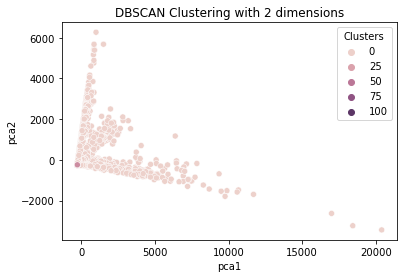

In [36]:
reduced_data = PCA(n_components=2).fit_transform(df)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=df['Clusters'], data=results)
plt.title('DBSCAN Clustering with 2 dimensions')
plt.show()

In [37]:
epsilon = [1,5,6,7,8,9,10,11,11.5,12,12.5,13,13.5]
min_samples = [10,15,20,25,30]

# epsilon = [1,1.25,1.5,1.75, 2,2.25,2.5,2.75, 3,3.25,3.5,3.75, 4]
# min_samples = [10,15,20,25]

sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(df)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = metrics.silhouette_score(df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 13 
min_sample= 15 
number of clusters= 3 
average silhouette score= 0.3333


In [38]:
db = DBSCAN(eps=13, min_samples=15).fit(df)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(df, labels))

Estimated number of clusters: 3
Estimated number of noise points: 2171
Silhouette Coefficient: 0.333


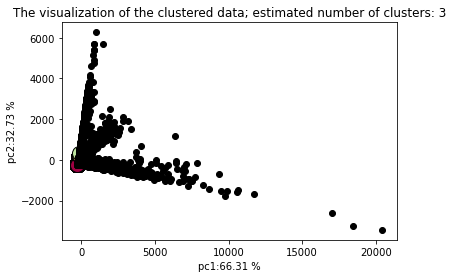

In [39]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = pca_data1[class_member_mask & core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = pca_data1[class_member_mask & ~core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('The visualization of the clustered data; estimated number of clusters: %d' % n_clusters_)
plt.xlabel("pc1:"+"{:.2f}".format(pca.explained_variance_ratio_[0]*100)+" %")
plt.ylabel("pc2:"+"{:.2f}".format(pca.explained_variance_ratio_[1]*100)+" %")
plt.show()

In [ ]:
cluster